In [2]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

%matplotlib inline

In [10]:
frame = 30
person_id = 1

In [11]:
im_path = Path(f"inference/images/img1/{str(frame).zfill(6)}.jpg").resolve()
next_im_path = Path(f"inference/images/img1/{str(frame + 1).zfill(6)}.jpg").resolve()
det_path = Path(f"output/20230307_211536.txt").resolve()
pred_path = Path(f"output/20230309_pred.txt").resolve()
assert im_path.exists() and im_path.is_file(), f"Image {im_path} does not exist"
assert det_path.exists() and det_path.is_file(), f"Detections {det_path} does not exist"
assert pred_path.exists() and pred_path.is_file(), f"Predictions {pred_path} does not exist"


im = cv2.imread(str(im_path))
next_im = cv2.imread(str(next_im_path))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
next_im = cv2.cvtColor(next_im, cv2.COLOR_BGR2RGB)

dets = np.loadtxt(det_path, delimiter=',')
det = dets[(dets[:, 1] == person_id) & (dets[:, 0] == frame)]

preds = np.loadtxt(pred_path, delimiter=',')
pred = preds[10, :]

In [13]:
proc_pred = pred
proc_pred[:2] -= pred[2:4]/2
proc_pred[2:] += pred[:2]
proc_pred = proc_pred.astype(int)

In [14]:
plot_img = im

c1 = det[0, 2:4].astype(int)
c2 = det[0, 2:4].astype(int) + det[0, 4:6].astype(int)

cv2.rectangle(plot_img, c1, c2, (255, 0, 0), 3);
cv2.rectangle(plot_img, proc_pred[:2], proc_pred[2:], (0, 0 ,255), 3);

In [15]:
det, proc_pred

(array([[ 3.00000e+01,  1.00000e+00,  1.57655e+03,  3.93080e+02,
          1.53650e+02,  4.32950e+02,  1.00000e+00, -1.00000e+00,
         -1.00000e+00, -1.00000e+00]]),
 array([1462,  414, 1650,  812]))

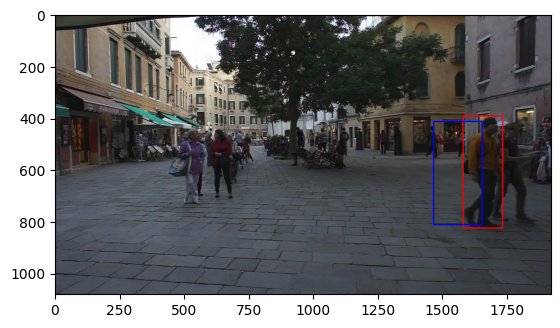

In [16]:
plt.imshow(plot_img);